In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [8]:
df = pd.read_csv('survey_results_public.csv')

In [9]:
df.head()

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,...,18-24 years old,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,...,25-34 years old,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN


In [10]:
df.describe()

,ResponseId,CompTotal,ConvertedCompYearly
count,83439.000000,4.718300e+04,4.684400e+04
mean,41720.000000,2.119407e+69,1.184262e+05
std,24086.908893,4.603702e+71,5.272944e+05
min,1.000000,0.000000e+00,1.000000e+00
25%,20860.500000,1.600000e+04,2.702500e+04
50%,41720.000000,6.700000e+04,5.621100e+04
75%,62579.500000,1.400000e+05,1.000000e+05
max,83439.000000,1.000000e+74,4.524131e+07


In [11]:
df.head(2)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,NaN,NaN,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [13]:
def age_convert(age_string):
    age_first_part = str(age_string).split('-')[0]
    return age_first_part

In [14]:
age_convert('25-30')

'25'

In [15]:
df['Age'] = df['Age'].apply(lambda age_object: str(age_object).split('-')[0]) 

In [16]:
df['Age']= pd.to_numeric(df['Age'],errors='coerce')

In [17]:
df['Age'].dtypes

dtype('float64')

In [18]:
df.describe()

,ResponseId,CompTotal,Age,ConvertedCompYearly
count,83439.000000,4.718300e+04,76035.000000,4.684400e+04
mean,41720.000000,2.119407e+69,27.221201,1.184262e+05
std,24086.908893,4.603702e+71,8.881559,5.272944e+05
min,1.000000,0.000000e+00,18.000000,1.000000e+00
25%,20860.500000,1.600000e+04,18.000000,2.702500e+04
50%,41720.000000,6.700000e+04,25.000000,5.621100e+04
75%,62579.500000,1.400000e+05,35.000000,1.000000e+05
max,83439.000000,1.000000e+74,55.000000,4.524131e+07


In [19]:
df.drop(['US_State', 'UK_Country', 'Age'], axis=1)

,ResponseId,MainBranch,Employment,Country,EdLevel,Age1stCode,LearnCode,YearsCode,YearsCodePro,DevType,...,NEWOtherComms,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,NaN,NaN,"Developer, mobile",...,No,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
1,2,I am a student who is learning to code,"Student, full-time",Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",7,NaN,NaN,...,No,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
2,3,"I am not primarily a developer, but I write co...","Student, full-time",Russian Federation,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",NaN,NaN,NaN,...,Yes,Man,No,Prefer not to say,Prefer not to say,None of the above,None of the above,Appropriate in length,Easy,NaN
3,4,I am a developer by profession,Employed full-time,Austria,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,NaN,NaN,NaN,"Developer, front-end",...,No,Man,No,Straight / Heterosexual,White or of European descent,I am deaf / hard of hearing,NaN,Appropriate in length,Neither easy nor difficult,NaN
4,5,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5 - 10 years,Friend or family member,17,10,"Developer, desktop or enterprise applications;...",...,No,Man,No,NaN,White or of European descent,None of the above,NaN,Appropriate in length,Easy,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83434,83435,I am a developer by profession,Employed full-time,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",6,5,"Developer, back-end",...,No,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a concentration and/or memory disorder ...,Appropriate in length,Easy,160500.0
83435,83436,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Benin,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",4,2,"Developer, full-stack",...,No,Man,No,Straight / Heterosexual,Black or of African descent,None of the above,None of the above,Appropriate in length,Easy,3960.0
83436,83437,I am a developer by profession,Employed full-time,United States of America,"Secondary school (e.g. American high school, G...",11 - 17 years,School,10,4,Data scientist or machine learning specialist;...,...,No,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,90000.0
83437,83438,I am a developer by profession,Employed full-time,Canada,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,5,3,"Developer, back-end",...,No,Man,No,Straight / Heterosexual,White or of European descent,None of the above,I have a mood or emotional disorder (e.g. depr...,Appropriate in length,Neither easy nor difficult,816816.0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ResponseId                    83439 non-null  int64  
 1   MainBranch                    83439 non-null  object 
 2   Employment                    83323 non-null  object 
 3   Country                       83439 non-null  object 
 4   US_State                      14920 non-null  object 
 5   UK_Country                    4418 non-null   object 
 6   EdLevel                       83126 non-null  object 
 7   Age1stCode                    83243 non-null  object 
 8   LearnCode                     82963 non-null  object 
 9   YearsCode                     81641 non-null  object 
 10  YearsCodePro                  61216 non-null  object 
 11  DevType                       66484 non-null  object 
 12  OrgSize                       60726 non-null  object 
 13  C

In [21]:
pd.set_option("display.max_rows", None)

In [22]:
df['Country'].value_counts()

United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
France                                                   2708
Brazil                                                   2254
Poland                                                   1805
Netherlands                                              1772
Italy                                                    1666
Australia                                                1646
Spain                                                    1485
Russian Federation                                       1474
Sweden                                                   1196
China                                                    1055
Turkey                                                   1054
Switzerl

In [23]:
df_countries = df.loc[df['Country'].isin(['United States of America','United Kingdom of Great Britain and Northern Ireland','Canada','Germany','India', 'France'])]

df_countries.groupby('Country')['ConvertedCompYearly'].median()

Country
Canada                                                   75631.0
France                                                   48936.0
Germany                                                  64859.0
India                                                    14748.0
United Kingdom of Great Britain and Northern Ireland     74970.0
United States of America                                125000.0
Name: ConvertedCompYearly, dtype: float64

In [24]:
df_countries.groupby('Country')['ConvertedCompYearly'].agg(['median','mean'])

,median,mean
Country,,
Canada,75631.0,135732.563006
France,48936.0,90213.514670
Germany,64859.0,103014.516754
India,14748.0,42522.583464
United Kingdom of Great Britain and Northern Ireland,74970.0,141688.554608
United States of America,125000.0,262993.898480


In [25]:
USA_df = df[df['Country']=='United States of America']
USA_df.shape

(15288, 48)

In [26]:
language_column = USA_df['LanguageHaveWorkedWith'].tolist()

Python_user_count = 0
Python_non_user = 0
count_NaN_values = 0
total_rows = len(language_column)
for languages in language_column:
  try:
    if 'Python' in languages:
      Python_user_count += 1
    else:
      Python_non_user += 1
  except:
    count_NaN_values += 1

print(f'total_rows: {total_rows}')
print(f'Python_user_count: {Python_user_count}')
print(f'Python_non_user: {Python_non_user}')
print(f'count_NaN_values: {count_NaN_values}')

total_rows: 15288
Python_user_count: 7975
Python_non_user: 7158
count_NaN_values: 155


In [27]:
Python_Users_USA = USA_df['LanguageHaveWorkedWith'].str.contains('Python').value_counts()[True]
Python_Users_USA

7975

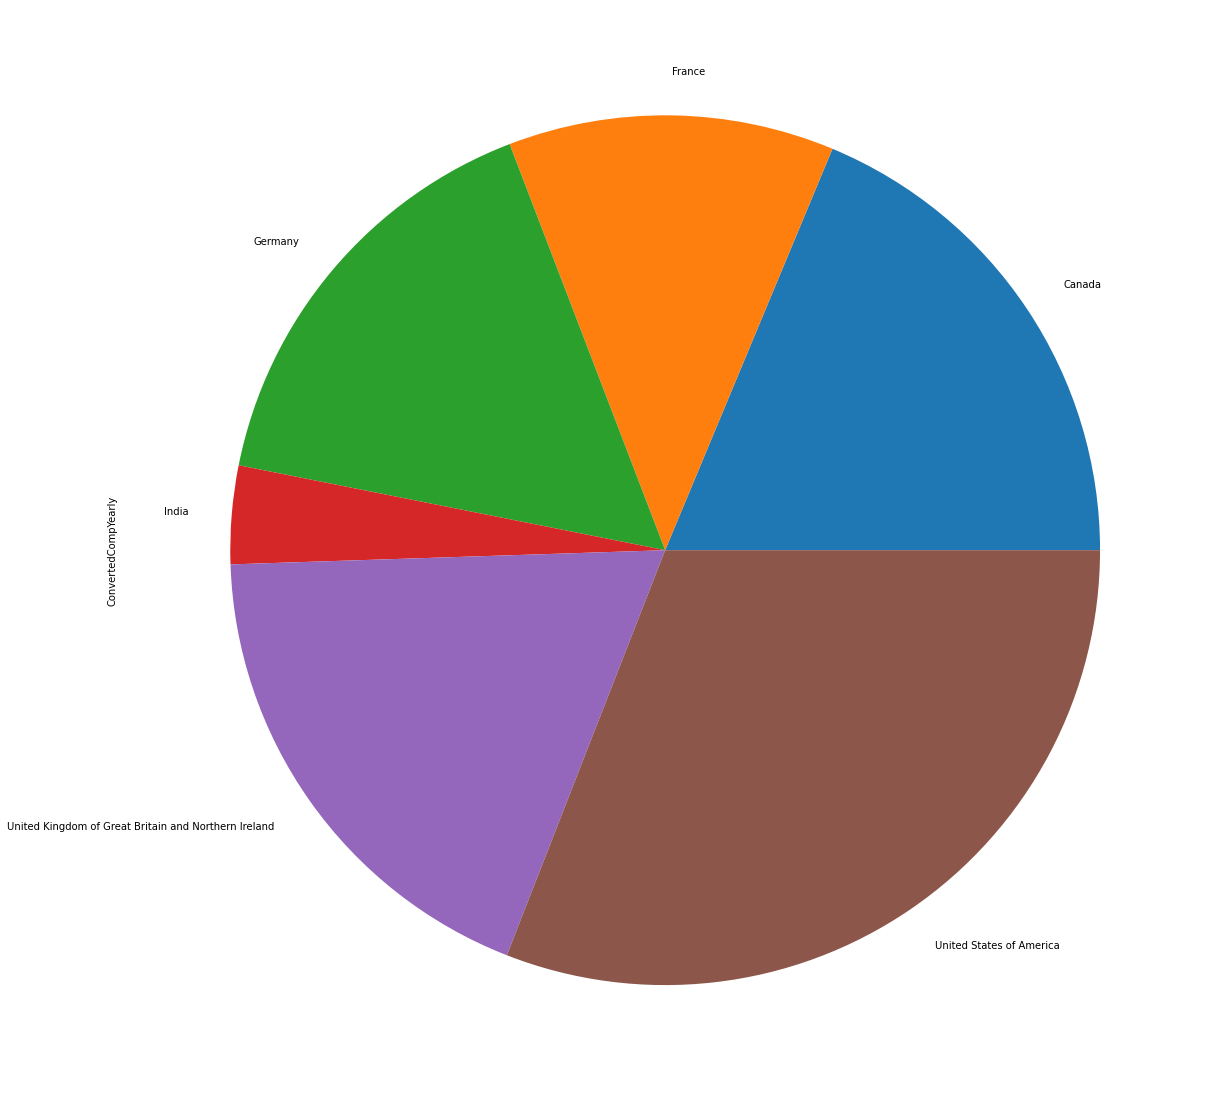

In [28]:
median_salaries = df_countries.groupby('Country')['ConvertedCompYearly'].median()
median_salaries.plot.pie(figsize=(25, 20));

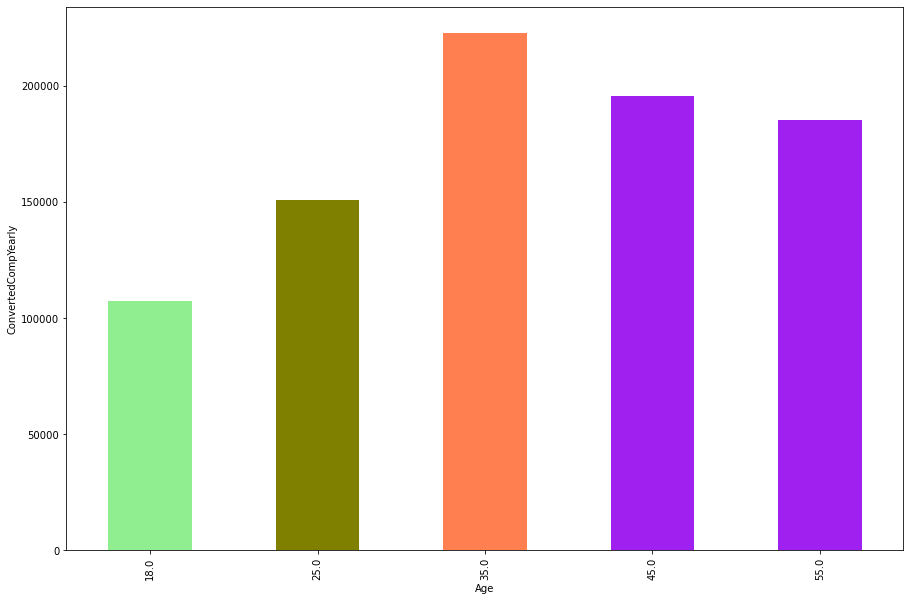

In [31]:
US_developer_AgeGroupby = df_countries.groupby('Age')['ConvertedCompYearly'].mean()
color_palette = ['#90EE90', '#808000', '#FF7F50', '#A020F0', '#A020F0']
plt.ylabel('ConvertedCompYearly')
US_developer_AgeGroupby.plot.bar(figsize=(15, 10), color=color_palette);

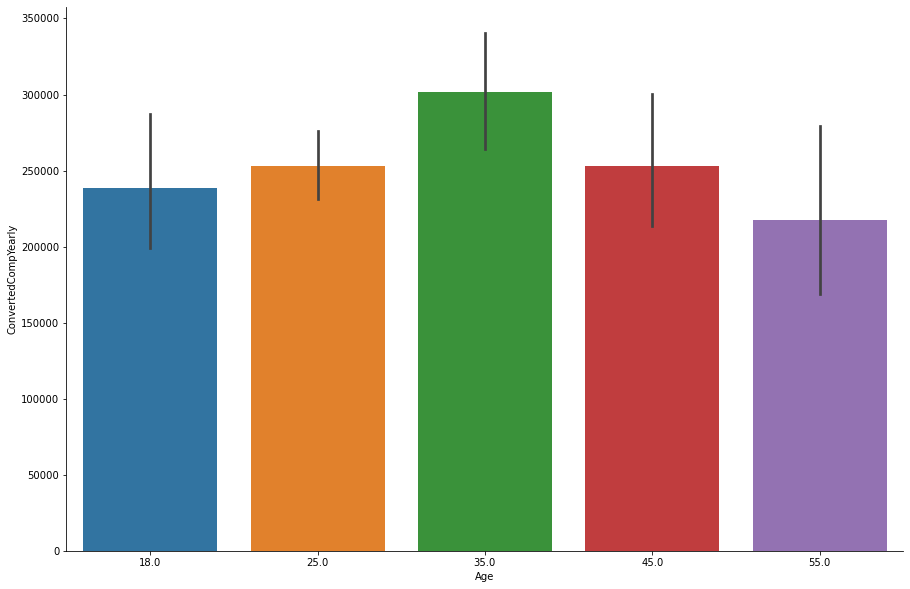

In [32]:
plt.rcParams["figure.figsize"] = (15,10)

sns.barplot(x = 'Age', y = 'ConvertedCompYearly', data = USA_df)
sns.despine()
plt.show()

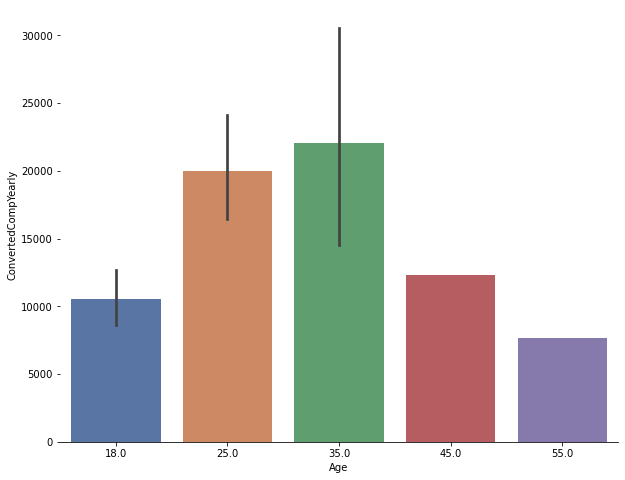

In [33]:
egypt_df = df[df['Country']=='Egypt']

plt.rcParams["figure.figsize"] = (10,8)
sns.barplot(x = 'Age', y = 'ConvertedCompYearly',data = egypt_df,palette='deep')
sns.despine(left=True)

In [34]:
top_20_NEWStuck_egypt = egypt_df['NEWStuck'].head(20)
top_20_NEWStuck_egypt

188     Call a coworker or friend;Visit Stack Overflow...
316     Visit Stack Overflow;Google it;Watch help / tu...
322     Call a coworker or friend;Visit Stack Overflow...
568     Visit Stack Overflow;Google it;Watch help / tu...
590             Visit Stack Overflow;Google it;Play games
636     Visit Stack Overflow;Google it;Watch help / tu...
1102    Call a coworker or friend;Visit Stack Overflow...
1780    Visit Stack Overflow;Google it;Meditate;Visit ...
1799    Visit Stack Overflow;Go for a walk or other ph...
1853    Call a coworker or friend;Visit Stack Overflow...
1916                       Visit Stack Overflow;Google it
1925    Visit Stack Overflow;Google it;Panic;Other (pl...
1938    Visit Stack Overflow;Google it;Do other work a...
2270    Visit Stack Overflow;Go for a walk or other ph...
2395    Call a coworker or friend;Visit Stack Overflow...
2801                                            Google it
2840    Visit Stack Overflow;Google it;Watch help / tu...
3634          

In [35]:
df['Country'].value_counts()

United States of America                                15288
India                                                   10511
Germany                                                  5625
United Kingdom of Great Britain and Northern Ireland     4475
Canada                                                   3012
France                                                   2708
Brazil                                                   2254
Poland                                                   1805
Netherlands                                              1772
Italy                                                    1666
Australia                                                1646
Spain                                                    1485
Russian Federation                                       1474
Sweden                                                   1196
China                                                    1055
Turkey                                                   1054
Switzerl

In [36]:
number_repondents = df['Country'].value_counts()

In [37]:
know_python = df['LanguageHaveWorkedWith'].str.contains('Python', na=False).groupby(df['Country']).sum()
know_python

Country
Afghanistan                                               20
Albania                                                   30
Algeria                                                   19
Andorra                                                    4
Angola                                                     5
Argentina                                                246
Armenia                                                   33
Australia                                                831
Austria                                                  377
Azerbaijan                                                33
Bahamas                                                    5
Bahrain                                                   14
Bangladesh                                               322
Barbados                                                   4
Belarus                                                   46
Belgium                                                  333
Belize          

In [38]:
python_df = pd.concat([number_repondents,know_python ],axis=1)
python_df.head()

,Country,LanguageHaveWorkedWith
United States of America,15288,7975
India,10511,5233
Germany,5625,2713
United Kingdom of Great Britain and Northern Ireland,4475,2149
Canada,3012,1593


In [39]:
python_df['percentage'] = python_df['LanguageHaveWorkedWith'] / python_df['Country']
python_df

,Country,LanguageHaveWorkedWith,percentage
United States of America,15288,7975,0.521651
India,10511,5233,0.497859
Germany,5625,2713,0.482311
United Kingdom of Great Britain and Northern Ireland,4475,2149,0.480223
Canada,3012,1593,0.528884
France,2708,1423,0.525480
Brazil,2254,951,0.421917
Poland,1805,812,0.449861
Netherlands,1772,831,0.468962
Italy,1666,735,0.441176


In [40]:
python_df.head(5)

,Country,LanguageHaveWorkedWith,percentage
United States of America,15288,7975,0.521651
India,10511,5233,0.497859
Germany,5625,2713,0.482311
United Kingdom of Great Britain and Northern Ireland,4475,2149,0.480223
Canada,3012,1593,0.528884


In [41]:
python_df.rename(columns={'Country':'TotalRespondents', 'LanguageHaveWorkedWith':'NumbKnowsPython', 'percentage':'PercentDevKnowPython'}, inplace=True)

In [42]:
python_df.head(50)

,TotalRespondents,NumbKnowsPython,PercentDevKnowPython
United States of America,15288,7975,0.521651
India,10511,5233,0.497859
Germany,5625,2713,0.482311
United Kingdom of Great Britain and Northern Ireland,4475,2149,0.480223
Canada,3012,1593,0.528884
France,2708,1423,0.525480
Brazil,2254,951,0.421917
Poland,1805,812,0.449861
Netherlands,1772,831,0.468962
Italy,1666,735,0.441176
